# Import Necessary Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Load the Dataset

In [10]:
df=pd.read_csv("cyberbullying_tweets.csv")

df.shape

(47692, 2)

In [11]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


# Data Preprocessing

Steps include: Case conversion, Removing special characters, Removing shorthands, Removing stopwords, Removing links, Removing accents, Normalize spaces (Ref: https://www.kaggle.com/code/vishnu0399/cyberbullying-detection-using-nlp)

In [13]:
def case_convert(data):
    data.tweet_text = [i.lower() for i in data.tweet_text.values]

def remove_specials(data):
    data.tweet_text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.tweet_text.values]

def remove_shorthands(data):
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.tweet_text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.tweet_text = texts

def remove_stopwords(data):
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.tweet_text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    data.tweet_text = texts
                
def remove_links(data):
    texts = []
    for text in data.tweet_text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.tweet_text = texts

def remove_accents(data):
    data.tweet_text = [unidecode.unidecode(text) for text in data.tweet_text.values]

def normalize_spaces(data):
    data.tweet_text = [re.sub(r"\s+"," ",text) for text in data.tweet_text.values]

case_convert(df)
remove_links(df)
remove_shorthands(df)
remove_accents(df)
remove_specials(df)
remove_stopwords(df)
normalize_spaces(df)
print(df)

                                              tweet_text cyberbullying_type
0                words katandandre food crapilicious mkr  not_cyberbullying
1       aussietv white mkr theblock imacelebrityau to...  not_cyberbullying
2       xochitlsuckkks classy whore red velvet cupcakes   not_cyberbullying
3       jason gio meh p thanks heads concerned anothe...  not_cyberbullying
4       rudhoeenglish isis account pretending kurdish...  not_cyberbullying
...                                                  ...                ...
47687   black ppl expected anything depended anything...          ethnicity
47688   turner withhold disappointment turner called ...          ethnicity
47689   swear god dumb nigger bitch got bleach hair r...          ethnicity
47690   yea fuck rt therealexel youre nigger fucking ...          ethnicity
47691   bro u gotta chill rt chillshrammy dog fuck kp...          ethnicity

[47692 rows x 2 columns]


# Humorous Word on each bullying category

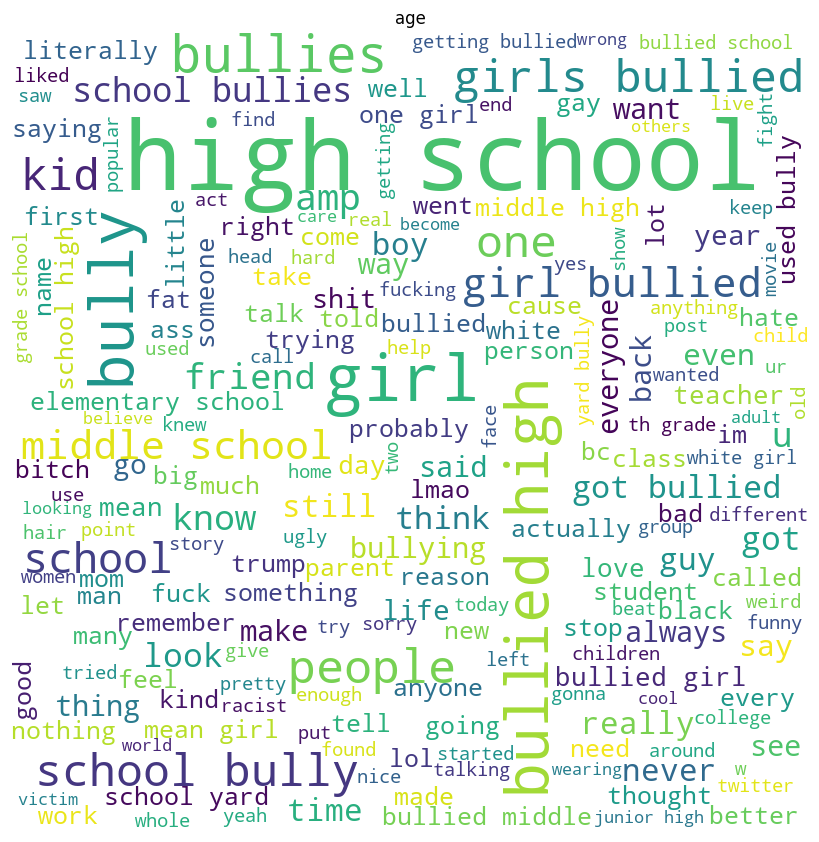

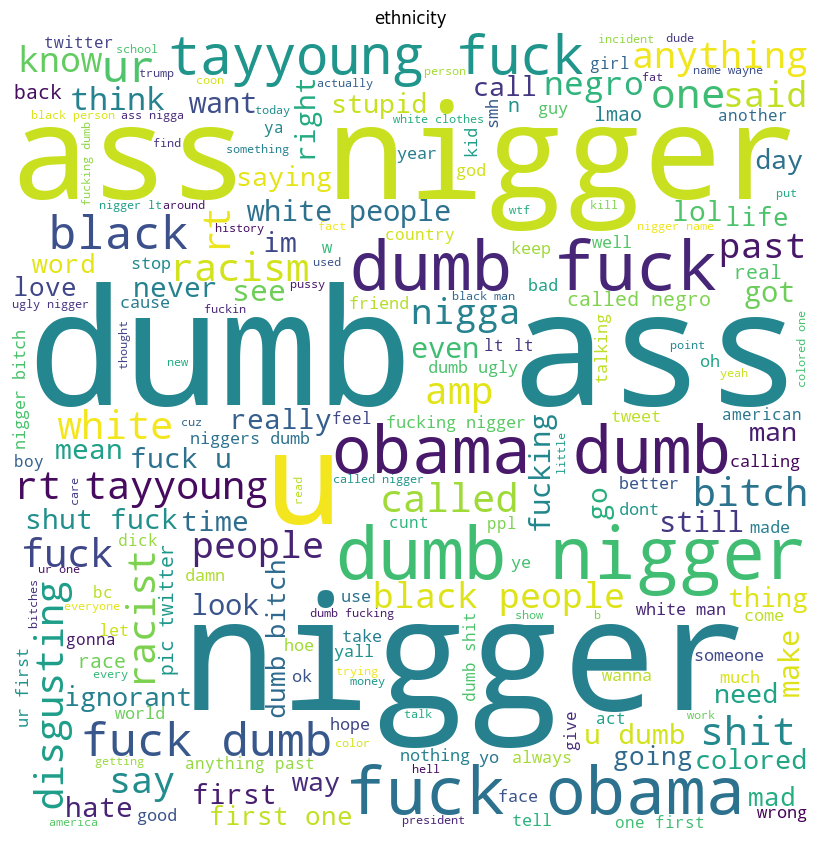

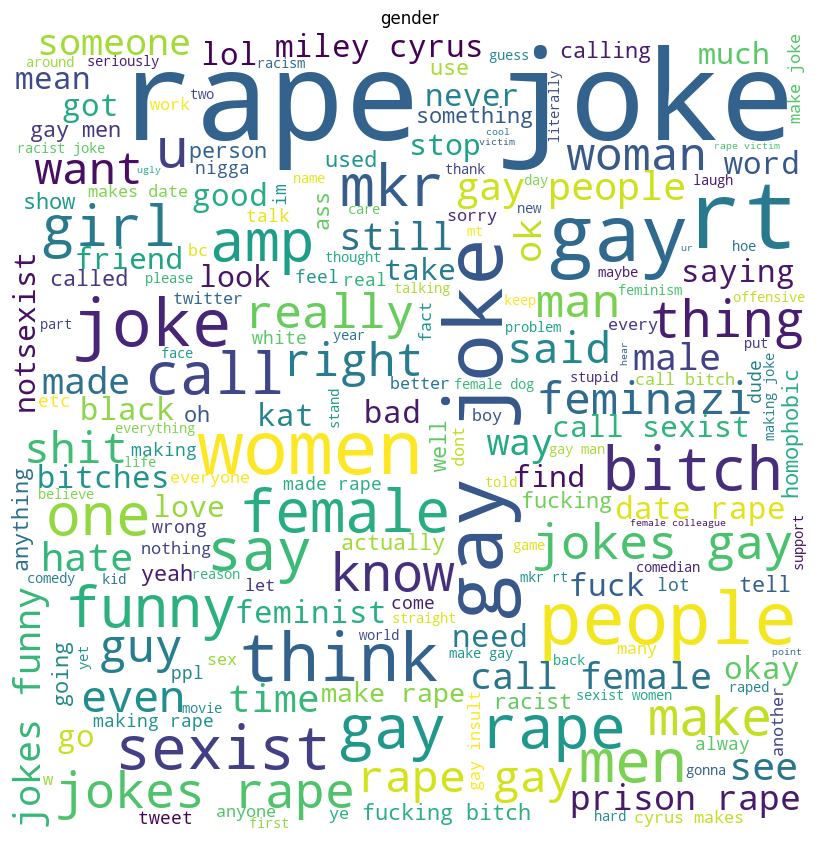

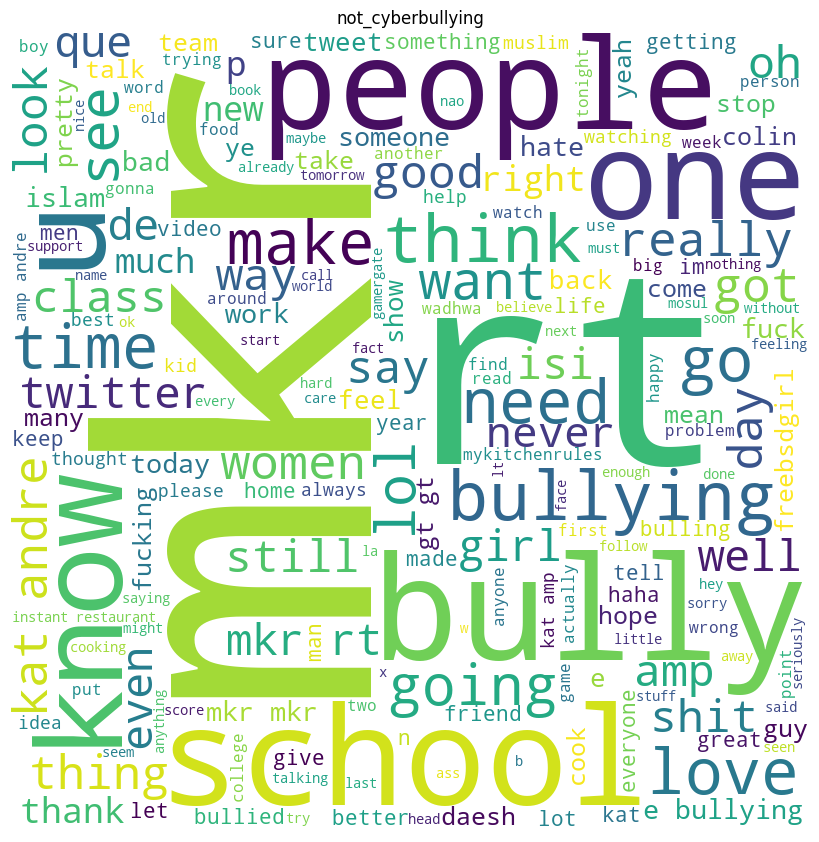

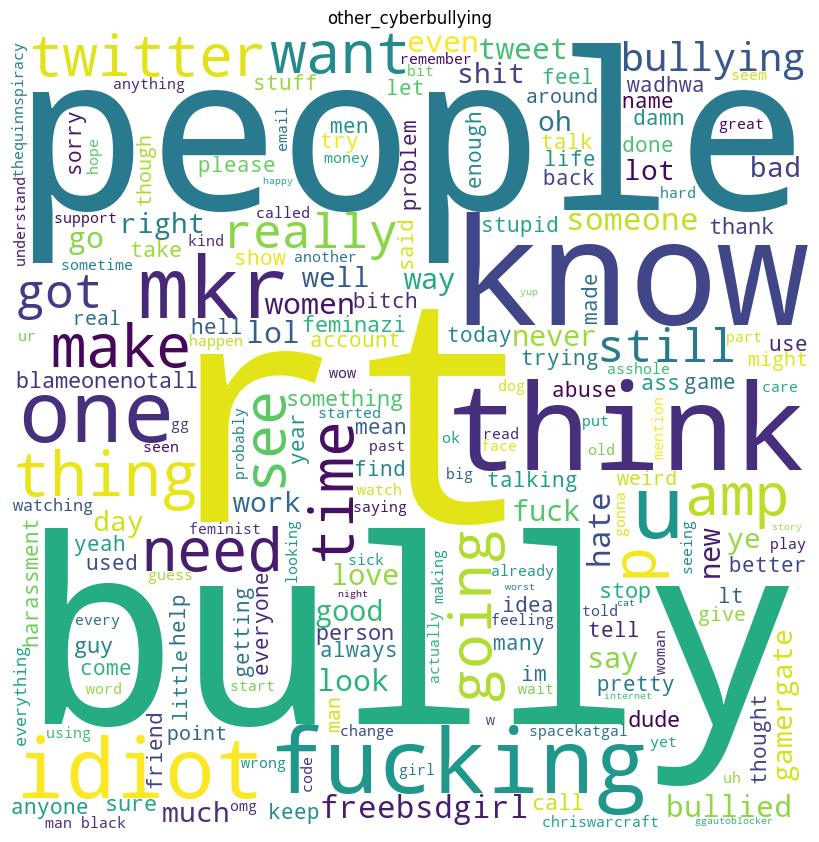

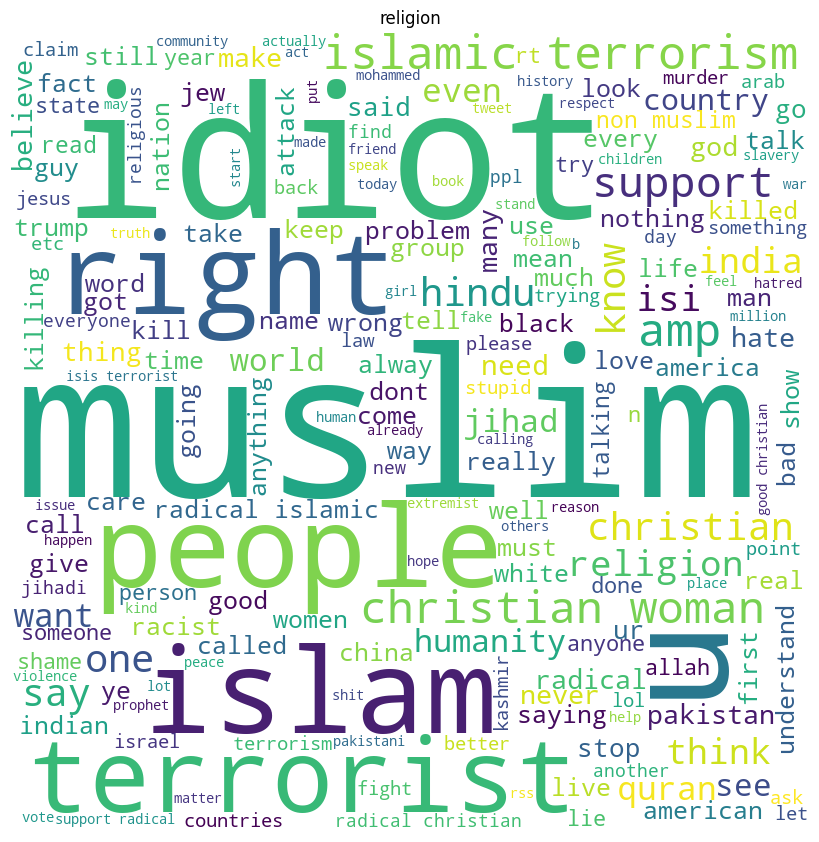

In [39]:
for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

# Sharmin's Contribution From Here

## LabelEncoding the Target

In [14]:
lenc = LabelEncoder()
df.cyberbullying_type = lenc.fit_transform(df.cyberbullying_type)

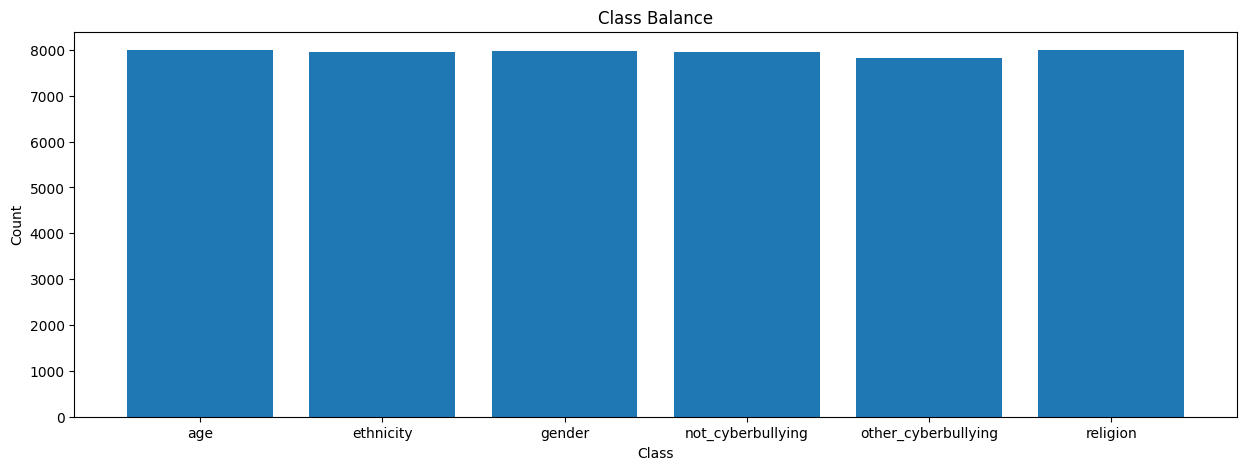

In [41]:
plt.figure(figsize=(15,5))
un, count = np.unique(df.cyberbullying_type.values, return_counts=True)
plt.bar([lenc.classes_[int(i)] for i in un] , count)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

# Classification Model

### split the dataset into 80-20%

In [16]:
vec = TfidfVectorizer(max_features=3000)

X_train, X_test, Y_train, Y_test = train_test_split(vec.fit_transform(df.tweet_text.values).toarray(), 
                                                    df.cyberbullying_type.values.reshape(-1,1), 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

### Logistic Regression

C:\Users\Sharmin_Sultana\Anaconda3\envs\Social_Computing\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sharmin_Sultana\Anaconda3\envs\Social_Computing\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1603
           1       0.98      0.97      0.98      1603
           2       0.90      0.82      0.86      1531
           3       0.61      0.53      0.57      1624
           4       0.60      0.74      0.67      1612
           5       0.95      0.94      0.95      1566

    accuracy                           0.83      9539
   macro avg       0.83      0.83      0.83      9539
weighted avg       0.83      0.83      0.83      9539

Precision       : 82.94 %
Recall          : 83.48 %
F1 Score          : 83.01 %


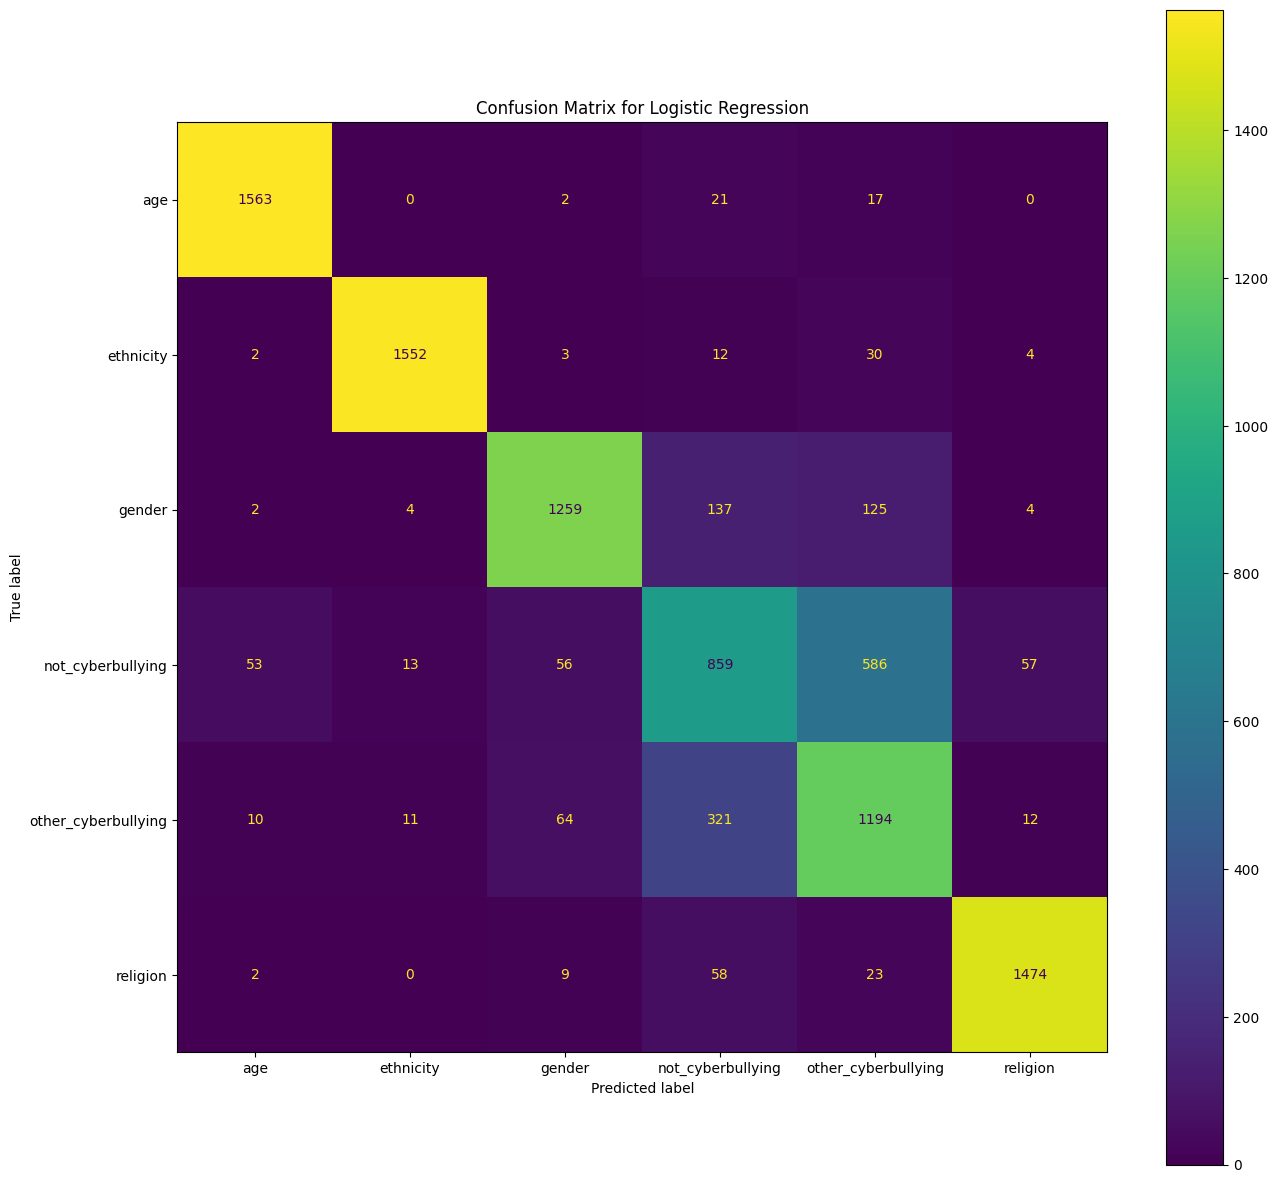

In [43]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
Y_pred=log_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
print("Precision       : {:.2f} %".format(precision_score(log_model.predict(X_test), Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(log_model.predict(X_test), Y_test,average='macro')*100))
print("F1 Score          : {:.2f} %".format(f1_score(log_model.predict(X_test), Y_test,average='macro')*100))
disp = ConfusionMatrixDisplay(cm, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### Random Forest

C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_11464\1422890940.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1603
           1       0.98      0.98      0.98      1603
           2       0.86      0.84      0.85      1531
           3       0.55      0.50      0.52      1624
           4       0.55      0.61      0.58      1612
           5       0.95      0.95      0.95      1566

    accuracy                           0.81      9539
   macro avg       0.81      0.81      0.81      9539
weighted avg       0.81      0.81      0.81      9539

Precision       : 80.92 %
Recall          : 81.04 %
F1 Score          : 80.93 %


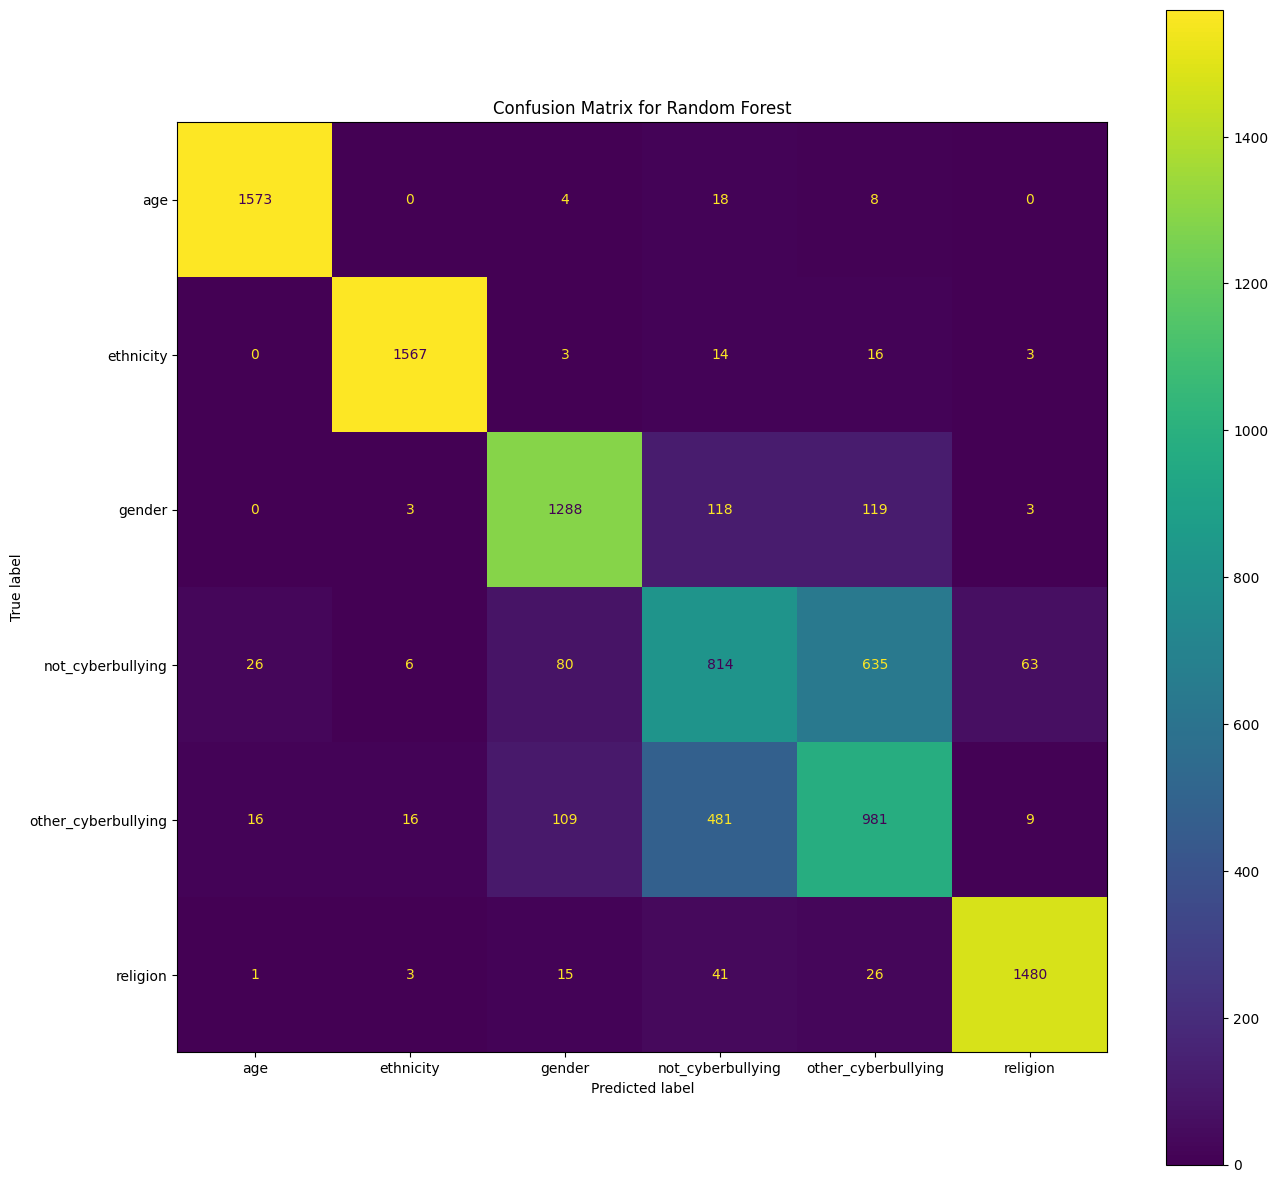

In [45]:
rf_model = RandomForestClassifier(n_estimators=10,random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred=rf_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
print("Precision       : {:.2f} %".format(precision_score(Y_pred, Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(Y_pred, Y_test,average='macro')*100))
print("F1 Score          : {:.2f} %".format(f1_score(Y_pred, Y_test,average='macro')*100))
disp = ConfusionMatrixDisplay(cm, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix for Random Forest")
plt.show()

### SVM

C:\Users\Sharmin_Sultana\Anaconda3\envs\Social_Computing\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1603
           1       0.98      0.98      0.98      1603
           2       0.91      0.83      0.87      1531
           3       0.63      0.50      0.56      1624
           4       0.61      0.77      0.68      1612
           5       0.96      0.94      0.95      1566

    accuracy                           0.83      9539
   macro avg       0.84      0.84      0.83      9539
weighted avg       0.84      0.83      0.83      9539

Precision       : 83.51 %
Recall          : 84.02 %
F1 Score          : 83.45 %


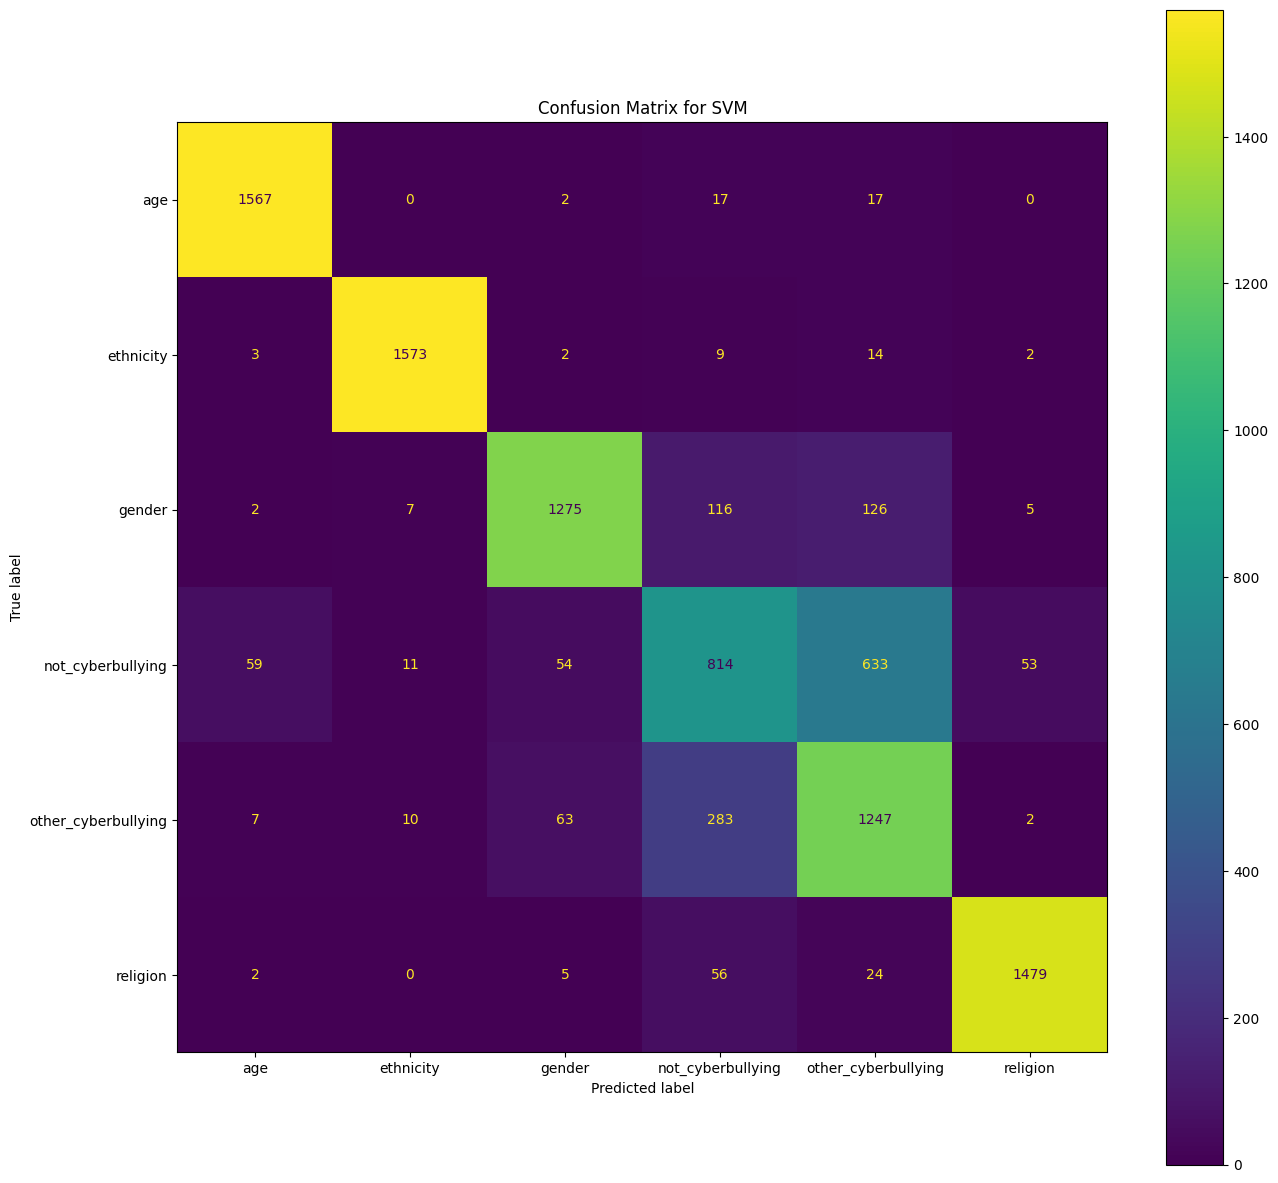

In [47]:
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, Y_train)
Y_pred=svm_model_linear.predict(X_test)
print(classification_report(Y_test,Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
print("Precision       : {:.2f} %".format(precision_score(Y_pred, Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(Y_pred, Y_test,average='macro')*100))
print("F1 Score          : {:.2f} %".format(f1_score(Y_pred, Y_test,average='macro')*100))
disp = ConfusionMatrixDisplay(cm, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix for SVM")
plt.show()

### Multi Layer Perceptron

C:\Users\Sharmin_Sultana\Anaconda3\envs\Social_Computing\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sharmin_Sultana\Anaconda3\envs\Social_Computing\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sharmin_Sultana\Anaconda3\envs\Social_Computing\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1603
           1       0.98      0.97      0.98      1603
           2       0.86      0.85      0.85      1531
           3       0.56      0.59      0.57      1624
           4       0.62      0.58      0.60      1612
           5       0.94      0.95      0.94      1566

    accuracy                           0.82      9539
   macro avg       0.82      0.82      0.82      9539
weighted avg       0.82      0.82      0.82      9539

Precision       : 81.85 %
Recall          : 81.88 %
F1 Score          : 81.84 %


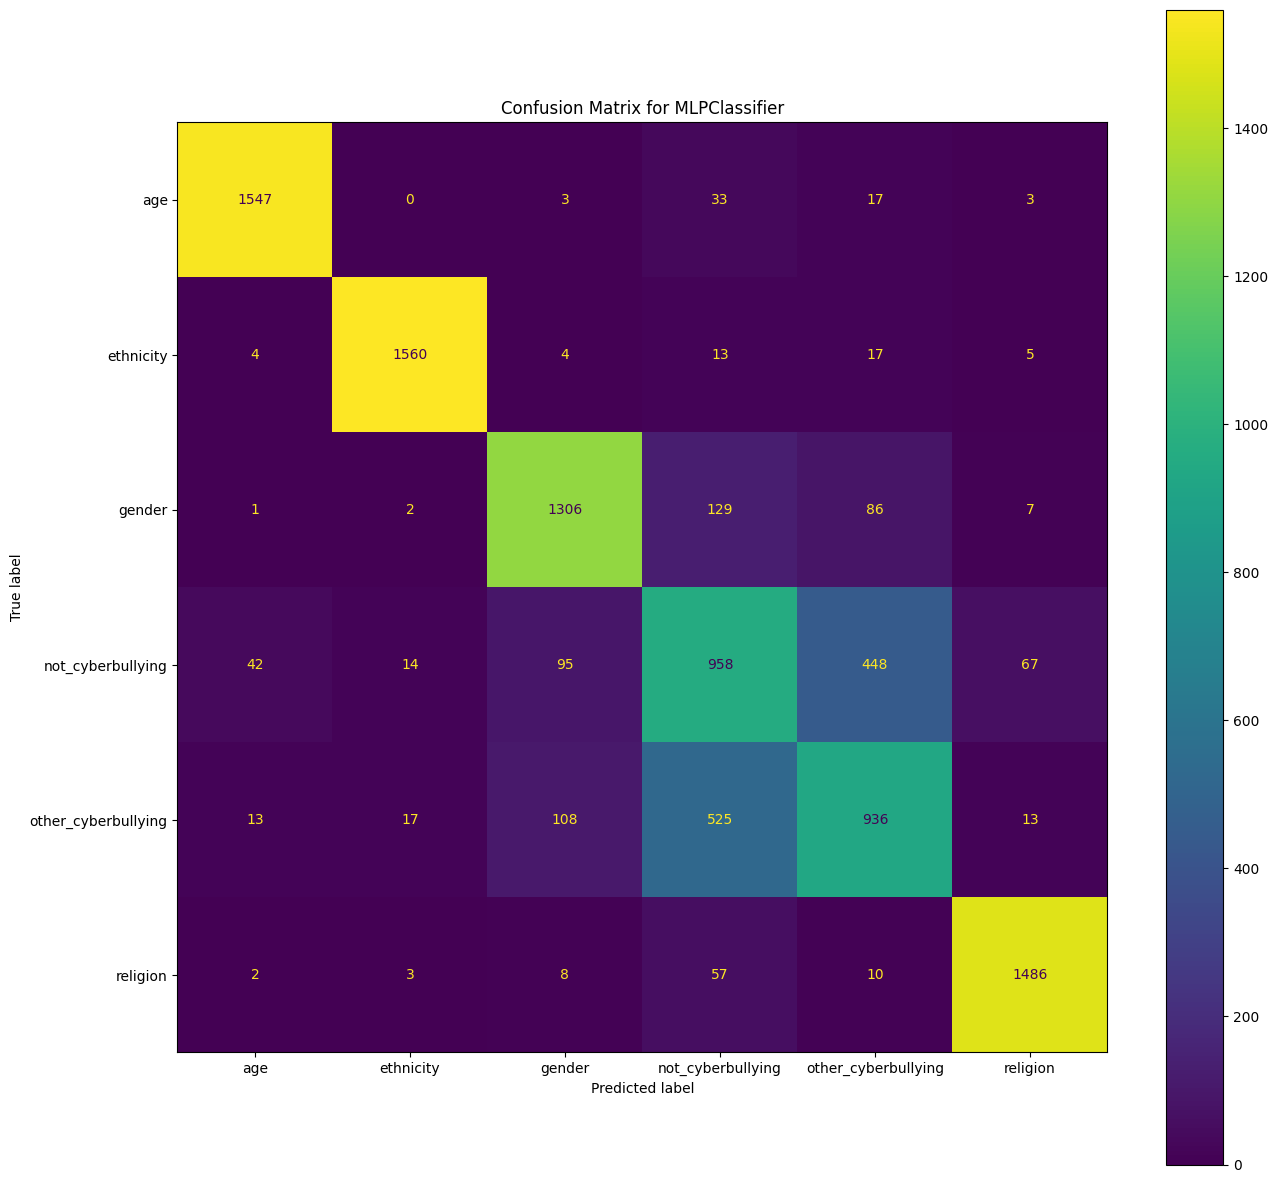

In [49]:
nn_model = MLPClassifier(activation = 'logistic', max_iter = 10)  # Sigmoid Activation Function
param_grid = {'learning_rate_init': [0.001, 0.0015, 0.002, 0.0025]}
grid_nn_model = HalvingGridSearchCV(nn_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_nn_model.fit(X_train, Y_train)
preds_grid_nn_model = grid_nn_model.predict(X_test)
print(classification_report(Y_test, preds_grid_nn_model))

cm = confusion_matrix(Y_test, preds_grid_nn_model)
print("Precision       : {:.2f} %".format(precision_score(preds_grid_nn_model, Y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(preds_grid_nn_model, Y_test,average='macro')*100))
print("F1 Score          : {:.2f} %".format(f1_score(preds_grid_nn_model, Y_test,average='macro')*100))
disp = ConfusionMatrixDisplay(cm, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix for MLPClassifier")
plt.show()